In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("PIMA.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

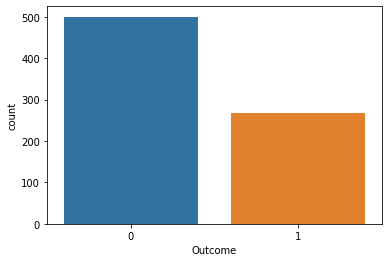

In [4]:
sns.countplot(x='Outcome',data=df)

In [5]:
from sklearn.utils import resample

df_majority = df[(df['Outcome']==0)] 
df_minority = df[(df['Outcome']==1)] 

# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 91500, # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])


In [6]:
df_upsampled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
269,2,146,0,0,0,27.5,0.240,28,1
283,7,161,86,0,0,30.4,0.165,47,1
195,5,158,84,41,210,39.4,0.395,29,1
535,4,132,0,0,0,32.9,0.302,23,1
38,2,90,68,42,0,38.2,0.503,27,1


<AxesSubplot:xlabel='Outcome', ylabel='count'>

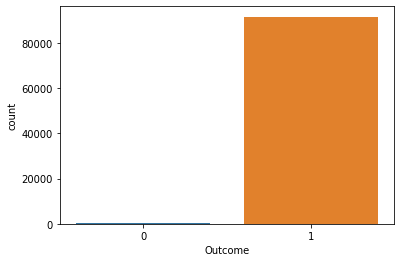

In [7]:
sns.countplot(x='Outcome',data=df_upsampled)

In [8]:
df_upsampled['Outcome'].value_counts()

Outcome
1    91500
0      500
Name: count, dtype: int64

In [9]:
df_minority_upsampled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
269,2,146,0,0,0,27.5,0.240,28,1
283,7,161,86,0,0,30.4,0.165,47,1
195,5,158,84,41,210,39.4,0.395,29,1
535,4,132,0,0,0,32.9,0.302,23,1
38,2,90,68,42,0,38.2,0.503,27,1


In [10]:
df_upsampled.replace({'Female':0,'Male':1,'Other':2},inplace=True)

In [11]:
df_upsampled.replace({'No Info':5,'never':0,'former':2,'current':3,'not current':4,'ever':1},inplace=True)

In [12]:
gender_dic = {'Female':0,'Male':1,'Other':2}
smoke_dic = {'No Info':5,'never':0,'former':2,'current':3,'not current':4,'ever':1}

In [13]:
df_upsampled.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
269,2,146,0,0,0,27.5,0.240,28,1
283,7,161,86,0,0,30.4,0.165,47,1
195,5,158,84,41,210,39.4,0.395,29,1
535,4,132,0,0,0,32.9,0.302,23,1
38,2,90,68,42,0,38.2,0.503,27,1
269,2,146,0,0,0,27.5,0.240,28,1
314,7,109,80,31,0,35.9,1.127,43,1
618,9,112,82,24,0,28.2,1.282,50,1
230,4,142,86,0,0,44.0,0.645,22,1
261,3,141,0,0,0,30.0,0.761,27,1


In [14]:
df_upsampled.count()

Pregnancies                 92000
Glucose                     92000
BloodPressure               92000
SkinThickness               92000
Insulin                     92000
BMI                         92000
DiabetesPedigreeFunction    92000
Age                         92000
Outcome                     92000
dtype: int64

In [13]:
df_upsampled.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
17356,0,57.0,0,1,3,23.89,5.8,240,1
76192,0,61.0,0,0,2,30.82,8.2,160,1
60999,1,56.0,0,0,1,32.20,5.7,160,1
9387,0,63.0,0,1,1,30.12,6.1,145,1
88960,1,39.0,0,0,0,34.83,6.0,140,1
68803,0,65.0,0,0,0,31.01,7.0,160,1
62903,1,80.0,0,0,3,27.98,6.5,200,1
57438,0,80.0,1,0,0,25.60,8.2,160,1
2685,1,58.0,0,0,4,27.14,6.6,240,1
33599,0,50.0,0,0,3,25.90,8.2,155,1


In [14]:
# feature importance using Random forest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train,x_test,y_train,y_test = train_test_split(df_upsampled.drop('diabetes', axis=1),df_upsampled.diabetes,test_size=0.2, random_state=231)
x_train

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
1109,0,70.0,0,0,5,27.32,6.5,100
7918,0,40.0,0,0,0,23.82,6.5,126
40646,0,66.0,1,0,4,28.11,5.7,100
80301,1,73.0,1,0,1,27.32,5.8,200
32695,0,48.0,0,0,2,30.15,6.6,240
...,...,...,...,...,...,...,...,...
19384,0,36.0,0,0,0,22.97,4.8,155
71297,0,8.0,0,0,0,15.99,6.5,100
29656,1,50.0,1,1,0,27.49,5.8,140
60030,1,18.0,0,0,0,24.78,8.2,130


In [15]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
y_pred = rf_model.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9935736632937794


In [19]:
feature_importances = rf_model.feature_importances_

In [20]:
feature_importances

array([0.0078517 , 0.2433034 , 0.02125231, 0.01181266, 0.03549418,
       0.13040659, 0.32406493, 0.22581423])

In [21]:
feature_importance_df = pd.DataFrame({'Feature': df.drop('diabetes', axis=1).columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
6,HbA1c_level,0.324065
1,age,0.243303
7,blood_glucose_level,0.225814
5,bmi,0.130407
4,smoking_history,0.035494
2,hypertension,0.021252
3,heart_disease,0.011813
0,gender,0.007852


In [22]:
df_features = df_upsampled[['HbA1c_level','blood_glucose_level','age','bmi','diabetes']]
df_features.head()

,HbA1c_level,blood_glucose_level,age,bmi,diabetes
17356,5.8,240,57.0,23.89,1
76192,8.2,160,61.0,30.82,1
60999,5.7,160,56.0,32.20,1
9387,6.1,145,63.0,30.12,1
88960,6.0,140,39.0,34.83,1


In [23]:
df_features.count()

HbA1c_level            177392
blood_glucose_level    177392
age                    177392
bmi                    177392
diabetes               177392
dtype: int64

In [27]:
# scaling data for ann

In [24]:
X = df_features.drop('diabetes',axis=1).values
y = df_features['diabetes'].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=11)

In [26]:
X_train = scaler.fit_transform(X_train)

In [27]:
X_test = scaler.transform(X_test)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [29]:
X_train.shape

(141913, 4)

In [30]:
model = Sequential()
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=25)

In [33]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
4435/4435 [==============================] - 14s 3ms/step - loss: 0.3222 - accuracy: 0.8552 - val_loss: 0.2850 - val_accuracy: 0.8717
Epoch 2/600
4435/4435 [==============================] - 11s 2ms/step - loss: 0.2838 - accuracy: 0.8720 - val_loss: 0.2801 - val_accuracy: 0.8733
Epoch 3/600
4435/4435 [==============================] - 11s 3ms/step - loss: 0.2782 - accuracy: 0.8745 - val_loss: 0.2764 - val_accuracy: 0.8732
Epoch 4/600
4435/4435 [==============================] - 11s 3ms/step - loss: 0.2751 - accuracy: 0.8755 - val_loss: 0.2732 - val_accuracy: 0.8756
Epoch 5/600
4435/4435 [==============================] - 11s 2ms/step - loss: 0.2735 - accuracy: 0.8757 - val_loss: 0.2722 - val_accuracy: 0.8757
Epoch 6/600
4435/4435 [==============================] - 11s 3ms/step - loss: 0.2724 - accuracy: 0.8758 - val_loss: 0.2710 - val_accuracy: 0.8768
Epoch 7/600
4435/4435 [==============================] - 12s 3ms/step - loss: 0.2713 - accuracy: 0.8758 - val_loss: 0.2698 -

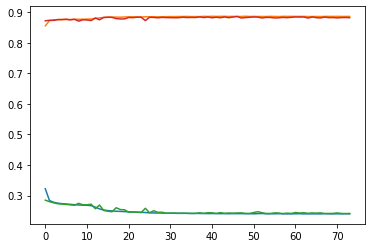

In [34]:
losses = pd.DataFrame(model.history.history)
plt.plot(losses)

In [35]:
import numpy as np
predict_x=model.predict(X_test) 

1109/1109 [==============================] - 3s 2ms/step


In [36]:
predict_x

array([[9.9988425e-01],
       [9.3836015e-08],
       [5.0335491e-01],
       ...,
       [5.7817197e-01],
       [6.9425225e-01],
       [7.5933760e-01]], dtype=float32)

In [37]:
import numpy as np

threshold = 0.5
binary_predictions = np.where(predict_x >= threshold, 1, 0)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix,explained_variance_score

In [39]:
explained_variance_score(y_test,binary_predictions)

0.5320632482846483

In [40]:
print(classification_report(y_test,binary_predictions))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87     17145
           1       0.86      0.92      0.89     18334

    accuracy                           0.88     35479
   macro avg       0.88      0.88      0.88     35479
weighted avg       0.88      0.88      0.88     35479



In [41]:
print(confusion_matrix(y_test,binary_predictions))

[[14409  2736]
 [ 1456 16878]]


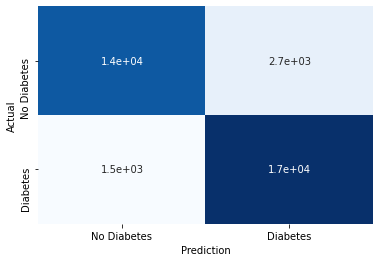

In [42]:
ax = sns.heatmap(confusion_matrix(y_test,binary_predictions), annot=True, xticklabels=["No Diabetes",'Diabetes'], yticklabels=['No Diabetes','Diabetes'],
                cbar=False,cmap='Blues')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()

In [43]:
import pickle
with open('mypickle.pkl', 'wb') as f:
    pickle.dump(model, f)